# **9. PIPELINE**

In [880]:
!pip install ydata-profiling efficient-apriori


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dferracuti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [881]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import efficient_apriori
import re
%matplotlib inline

def ZS(data, threshold):
    mean = np.mean(data)
    sd = np.std(data) # calculate standard deviation
    outliers = [] # create empty list to store outliers
    for i in data: # detect outliers
        z = (i - mean) / sd  # calculate z-score
        if abs(z) > threshold:  # identify outliers
            outliers.append(i)  # add to the empty list

    # print outliers
    print("The detected outliers are: ", str(outliers))


**1) DATA EXPLORATION & PROFILING**

In [882]:
HOTELS = pd.read_csv(
    "https://raw.githubusercontent.com/SamuGalli/DIQ/main/Comune-di-Milano---Strutture-ricettive-alberghiere.csv",
    sep=';',
    encoding='unicode_escape'
)
HOTELS


Ubicazione Tipo via  Descrizione via  Civico  \
0     ALZ NAVIGLIO GRANDE N. 8 (z.d. 6)      ALZ  NAVIGLIO GRANDE     8.0   
1             codvia 0000 num.024  ; ()      NaN              NaN     NaN   
2       CSO BUENOS AIRES N. 18 (z.d. 3)      CSO     BUENOS AIRES    18.0   
3       CSO BUENOS AIRES N. 26 (z.d. 3)      CSO     BUENOS AIRES    26.0   
4        CSO BUENOS AIRES N. 2 (z.d. 3)      CSO     BUENOS AIRES     2.0   
..                                  ...      ...              ...     ...   
446           VLE TUNISIA N. 6 (z.d. 3)      VLE          TUNISIA     6.0   
447           VLE TUNISIA N. 9 (z.d. 3)      VLE          TUNISIA     9.0   
448  VLE VITTORIO VENETO N. 30 (z.d. 2)      VLE  VITTORIO VENETO    30.0   
449              VLE ZARA N. 1 (z.d. 9)      VLE             ZARA     1.0   
450             VLE ZARA N. 89 (z.d. 9)      VLE             ZARA    89.0   

     Codice via   ZD  Camere Camere piano Categoria  \
0        5144.0  6.0    14.0          NaN         4   
1           NaN  NaN   259.0          259         4   
2        2129.0  3.0    16.0           16         1   
3        2129.0  3.0    25.0          NaN         3   
4        2129.0  3.0    46.0      15;11;8         3   
..          ...  ...     ...          ...       ...   
446      2121.0  3.0    13.0           16         1   
447      2121.0  3.0    50.0    3;6;9;9;9         4   
448      2107.0  2.0    15.0          NaN         2   
449      1170.0  9.0    32.0          NaN         4   
450      1170.0  9.0    22.0       12;7;4         3   

                                 Insegna  Piani totali Piano piano  \
0                   HOTEL MAISON BORELLA           NaN         NaN   
1               radisson blu hotel milan           NaN         NaN   
2                           hotel aurora           1.0           1   
3                     hotel buenos aires           NaN         NaN   
4                         albergo fenice           4.0     1;2;3;4   
..                                   ...           ...         ...   
446                        hotel kennedy           1.0           6   
447                     st. george hotel           NaN   A;1;2;3;4   
448                       hotel casa mia           NaN         NaN   
449  casa albergo residence zara lagosta           NaN         NaN   
450                           hotel gala           3.0       R;1;2   

     Posti letto Posti letto per piano Tipo attività struture extra  
0           25.0                   NaN                      Albergo  
1          518.0                   518                      Albergo  
2           25.0                    25                      Albergo  
3           39.0                   NaN                      Albergo  
4           98.0              24;19;13                      Albergo  
..           ...                   ...                          ...  
446         23.0                    23                      Albergo  
447         99.0         5;16;26;26;26                      Albergo  
448         25.0                   NaN                      Albergo  
449         64.0                   NaN                    Residence  
450         35.0               20;12;7                      Albergo  

[451 rows x 15 columns]

In [883]:
HOTELS.columns

Index(['Ubicazione', 'Tipo via', 'Descrizione via', 'Civico', 'Codice via',
       'ZD', 'Camere', 'Camere piano', 'Categoria', 'Insegna', 'Piani totali',
       'Piano piano', 'Posti letto', 'Posti letto per piano',
       'Tipo attività struture extra'],
      dtype='object')

In [884]:
HOTELS.head()

Ubicazione Tipo via  Descrizione via  Civico  \
0  ALZ NAVIGLIO GRANDE N. 8 (z.d. 6)      ALZ  NAVIGLIO GRANDE     8.0   
1          codvia 0000 num.024  ; ()      NaN              NaN     NaN   
2    CSO BUENOS AIRES N. 18 (z.d. 3)      CSO     BUENOS AIRES    18.0   
3    CSO BUENOS AIRES N. 26 (z.d. 3)      CSO     BUENOS AIRES    26.0   
4     CSO BUENOS AIRES N. 2 (z.d. 3)      CSO     BUENOS AIRES     2.0   

   Codice via   ZD  Camere Camere piano Categoria                   Insegna  \
0      5144.0  6.0    14.0          NaN         4      HOTEL MAISON BORELLA   
1         NaN  NaN   259.0          259         4  radisson blu hotel milan   
2      2129.0  3.0    16.0           16         1              hotel aurora   
3      2129.0  3.0    25.0          NaN         3        hotel buenos aires   
4      2129.0  3.0    46.0      15;11;8         3            albergo fenice   

   Piani totali Piano piano  Posti letto Posti letto per piano  \
0           NaN         NaN         25.0                   NaN   
1           NaN         NaN        518.0                   518   
2           1.0           1         25.0                    25   
3           NaN         NaN         39.0                   NaN   
4           4.0     1;2;3;4         98.0              24;19;13   

  Tipo attività struture extra  
0                      Albergo  
1                      Albergo  
2                      Albergo  
3                      Albergo  
4                      Albergo

In [885]:
HOTELS.shape


(451, 15)

In [886]:
HOTELS.describe()


Civico   Codice via          ZD      Camere  Piani totali  \
count    421.000000   437.000000  437.000000  450.000000    187.000000   
mean     126.061758  3105.935927    4.075515   60.002222      4.614973   
std     2026.885920  2140.700197    2.607553   70.441133      2.482496   
min        1.000000     1.000000    1.000000    7.000000      1.000000   
25%        7.000000  1510.000000    2.000000   16.000000      3.000000   
50%       16.000000  2250.000000    3.000000   32.000000      4.000000   
75%       33.000000  5097.000000    7.000000   72.000000      6.000000   
max    41609.000000  7505.000000    9.000000  439.000000     17.000000   

       Posti letto  
count   450.000000  
mean    114.128889  
std     141.013548  
min       7.000000  
25%      25.000000  
50%      60.000000  
75%     137.250000  
max     922.000000

In [887]:
HOTELS.dtypes


Ubicazione                       object
Tipo via                         object
Descrizione via                  object
Civico                          float64
Codice via                      float64
ZD                              float64
Camere                          float64
Camere piano                     object
Categoria                        object
Insegna                          object
Piani totali                    float64
Piano piano                      object
Posti letto                     float64
Posti letto per piano            object
Tipo attività struture extra     object
dtype: object

In [888]:
HOTELS.duplicated().any()


np.False_

In [889]:
#display numeric columns
NUM = list(HOTELS.select_dtypes(include=['int64','float64']).columns)
NUM

['Civico', 'Codice via', 'ZD', 'Camere', 'Piani totali', 'Posti letto']

In [890]:
#display categorical columns
CAT = list(HOTELS.select_dtypes(include=['bool','object']).columns)
CAT

['Ubicazione',
 'Tipo via',
 'Descrizione via',
 'Camere piano',
 'Categoria',
 'Insegna',
 'Piano piano',
 'Posti letto per piano',
 'Tipo attività struture extra']

In [891]:
NUM = list(HOTELS.select_dtypes(include=['int64','float64']).columns)
DATA_NUM = HOTELS[NUM]
DATA_NUM.corr(method ='pearson')

Civico  Codice via        ZD    Camere  Piani totali  \
Civico        1.000000    0.052579  0.037795 -0.035578     -0.080438   
Codice via    0.052579    1.000000  0.608274 -0.080578     -0.159560   
ZD            0.037795    0.608274  1.000000  0.060257     -0.147236   
Camere       -0.035578   -0.080578  0.060257  1.000000      0.607333   
Piani totali -0.080438   -0.159560 -0.147236  0.607333      1.000000   
Posti letto  -0.032137   -0.078936  0.076507  0.981215      0.588873   

              Posti letto  
Civico          -0.032137  
Codice via      -0.078936  
ZD               0.076507  
Camere           0.981215  
Piani totali     0.588873  
Posti letto      1.000000

Histogram for Civico:


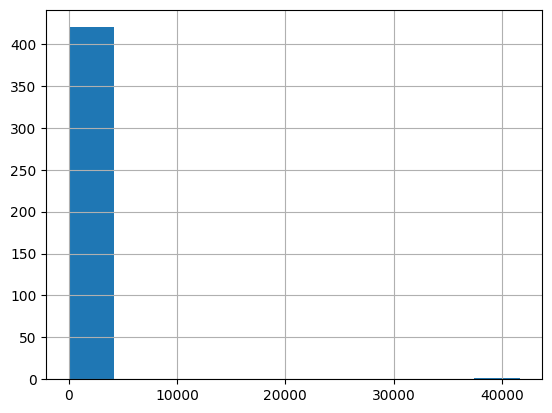

Histogram for Codice via:


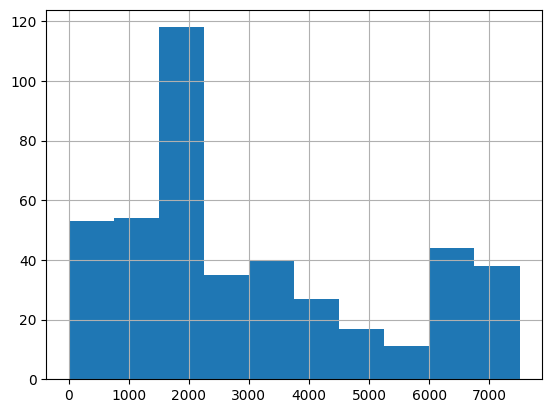

Histogram for ZD:


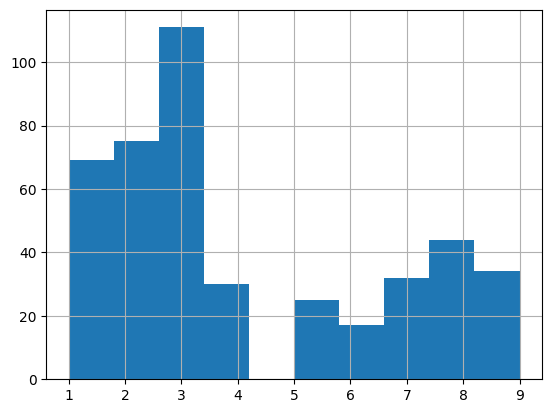

Histogram for Camere:


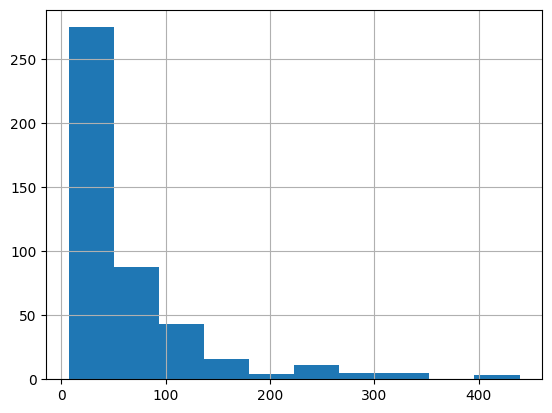

Histogram for Piani totali:


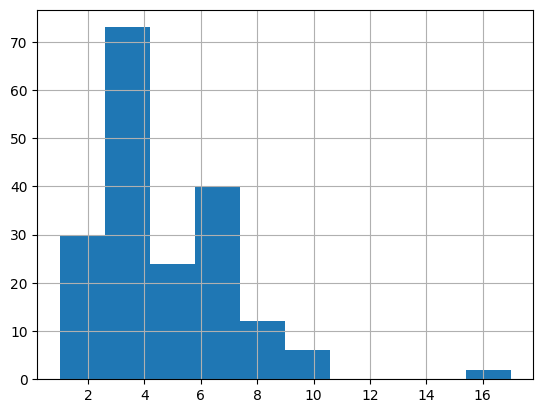

Histogram for Posti letto:


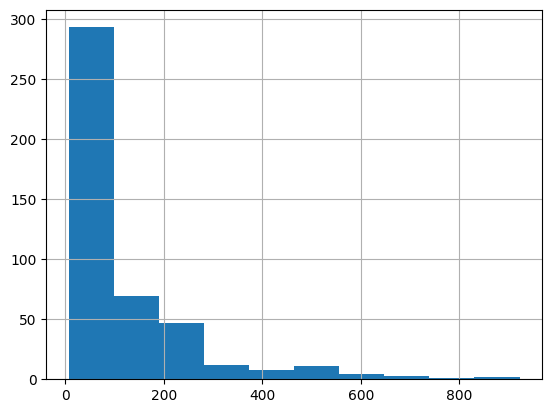

In [892]:
for col in NUM:
    print("Histogram for "+col+":")
    HOTELS[col].hist()
    plt.show()

In [893]:
PROFILE = ProfileReport(HOTELS, title="Pandas Profiling Report")
PROFILE

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**2) DQ ASSESSMENT**

In [894]:
for col in HOTELS.columns:
    print("DQ Assessment for "+col+":")

    DISTINCT = (HOTELS[col].nunique())
    COUNT = HOTELS[col].count()
    ROWS = len(HOTELS[col])
    UNIQUENESS = DISTINCT / ROWS
    print("UNIQUENESS: ", UNIQUENESS)

    DISTINCTNESS = DISTINCT / COUNT
    print("DISTINCTNESS: ", DISTINCTNESS)

    MAX_COUNTS = max(HOTELS[col].value_counts())
    CONSTANCY = MAX_COUNTS / COUNT
    print("CONSTANCY: ", CONSTANCY)

    NOT_NULL = HOTELS.count().sum()
    NULL = HOTELS.isnull().sum().sum()
    TOT = HOTELS.shape[0]*HOTELS.shape[1]
    COMPLETENESS = NOT_NULL / TOT
    print("COMPLETENESS: ", COMPLETENESS)

    print("\n\n")

DQ Assessment for Ubicazione:
UNIQUENESS:  0.9711751662971175
DISTINCTNESS:  0.9711751662971175
CONSTANCY:  0.0066518847006651885
COMPLETENESS:  0.8753880266075388



DQ Assessment for Tipo via:
UNIQUENESS:  0.017738359201773836
DISTINCTNESS:  0.018306636155606407
CONSTANCY:  0.7574370709382151
COMPLETENESS:  0.8753880266075388



DQ Assessment for Descrizione via:
UNIQUENESS:  0.6651884700665188
DISTINCTNESS:  0.6864988558352403
CONSTANCY:  0.02288329519450801
COMPLETENESS:  0.8753880266075388



DQ Assessment for Civico:
UNIQUENESS:  0.19955654101995565
DISTINCTNESS:  0.21377672209026127
CONSTANCY:  0.052256532066508314
COMPLETENESS:  0.8753880266075388



DQ Assessment for Codice via:
UNIQUENESS:  0.6696230598669624
DISTINCTNESS:  0.6910755148741419
CONSTANCY:  0.02288329519450801
COMPLETENESS:  0.8753880266075388



DQ Assessment for ZD:
UNIQUENESS:  0.019955654101995565
DISTINCTNESS:  0.020594965675057208
CONSTANCY:  0.2540045766590389
COMPLETENESS:  0.8753880266075388



DQ Asses

**ACCURACY**

In [895]:
# Queste funzioni servono a verificare la correttezza sintattica dei dati

# Verifica di ogni colonna
def check_ubicazione(value):
    pattern = r'^(VIA|VLE|CSO|PZA|PLE|LGO|GLL|ALZ).*\(z\.d\. \d+\)$'
    return bool(re.match(pattern, value))

def check_isdigit(value, value_range):
    value_str = str(value)
    
    # Controlla se è un numero intero
    if value_str.isdigit():
        num_value = int(value_str)
        return value_range[0] <= num_value <= value_range[1]
    
    # Controlla se è un float con .0 (es. 5.0)
    if value_str.count('.') == 1 and value_str.split('.')[1] == '0' and value_str.split('.')[0].isdigit():
        num_value = float(value_str)
        return value_range[0] <= num_value <= value_range[1]
    
    return False

def check_whitelist(value, whitelisted_values):
    return value in whitelisted_values

def check_numeric_list(value):
    if type(value) == str:
        pattern = r'^\d+(\;\d+)*$'
        return bool(re.match(pattern, value))
    else:
        return bool(0)
    
def check_list(value):
    if type(value) == str:
        pattern = r'^[A-Z0-9]+(\;[A-Z0-9]+)*$'
        return bool(re.match(pattern, value))
    else:
        return bool(0)    

In [896]:
Ubicazione_Valid = HOTELS['Ubicazione'].dropna().apply(check_ubicazione)
accuracy_Ubicazione = Ubicazione_Valid.mean() * 100  # Percentuale di righe valide


Tipo_via_Valid = HOTELS['Tipo via'].dropna().apply(lambda value: check_whitelist(value, ['CSO', 'VIA', 'VLE', 'PZA', 'PLE', 'LGO', 'GLL', 'ALZ']))
accuracy_Tipo_via = Tipo_via_Valid.mean() * 100  # Percentuale di righe valide


Civico_Valid = HOTELS['Civico'].dropna().apply(lambda value: check_isdigit(value, (0, 500)))
accuracy_Civico = Civico_Valid.mean() * 100  # Percentuale di righe valide


Codice_via_Valid = HOTELS['Codice via'].dropna().apply(lambda value: check_isdigit(value, (0, 10000)))
accuracy_Codice_via = Codice_via_Valid.mean() * 100  # Percentuale di righe valide


ZD_Valid = HOTELS['Codice via'].dropna().apply(lambda value: check_isdigit(value, (0, 10)))
accuracy_ZD = Codice_via_Valid.mean() * 100  # Percentuale di righe valide


Camere_Valid = HOTELS['Camere'].dropna().apply(lambda value: check_isdigit(value, (0, 500)))
accuracy_Camere = Camere_Valid.mean() * 100  # Percentuale di righe valide


Camere_piano_Valid = HOTELS['Camere piano'].dropna().apply(check_numeric_list)
accuracy_Camere_piano = Camere_piano_Valid.mean() * 100  # Percentuale di righe valide


Categoria_Valid = HOTELS['Categoria'].dropna().apply(lambda value: check_isdigit(value, (1, 5)))
accuracy_Categoria = Categoria_Valid.mean() * 100  # Percentuale di righe valide


Piani_Valid = HOTELS['Piani totali'].dropna().apply(lambda value: check_isdigit(value, (1, 20)))
accuracy_Piani = Piani_Valid.mean() * 100  # Percentuale di righe valide

Piano_piano_Valid = HOTELS['Piano piano'].dropna().apply(check_list)
accuracy_Piano_piano = Piano_piano_Valid.mean() * 100  # Percentuale di righe valide

Posti_letto_Valid = HOTELS['Posti letto'].dropna().apply(lambda value: check_isdigit(value, (1, 1000)))
accuracy_Posti_letto = Posti_letto_Valid.mean() * 100  # Percentuale di righe valide

Posti_letto_piano_Valid = HOTELS['Posti letto per piano'].dropna().apply(check_numeric_list)
accuracy_Posti_letto_piano = Posti_letto_piano_Valid.mean() * 100  # Percentuale di righe valide

Tipo_Attività = HOTELS['Tipo attività struture extra'].dropna().apply(lambda value: check_whitelist(value, ['Albergo', 'Residence']))
Tipo_attività_Categoria = Tipo_Attività.mean() * 100  # Percentuale di righe valide

In [897]:
print("- ACCURACY:")
print(f"    Tipo via Accuracy: {accuracy_Tipo_via:.2f}%")
print(f"    Ubicazione Accuracy: {accuracy_Ubicazione:.2f}%")
print(f"    Civico Accuracy: {accuracy_Civico:.2f}%")
print(f"    Codice via Accuracy: {accuracy_Codice_via:.2f}%")
print(f"    ZD Accuracy: {accuracy_ZD:.2f}%")
print(f"    Camere Accuracy: {accuracy_Camere:.2f}%")
print(f"    Camere piano Accuracy: {accuracy_Camere_piano:.2f}%")
print(f"    Categoria Accuracy: {accuracy_Categoria:.2f}%")
print(f"    Piani totali Accuracy: {accuracy_Piani:.2f}%")
print(f"    Piano piano Accuracy: {accuracy_Piano_piano:.2f}%")
print(f"    Posti letto Accuracy: {accuracy_Posti_letto:.2f}%")
print(f"    Posti letto per piano Accuracy: {accuracy_Posti_letto_piano:.2f}%")
print(f"    Tipo attività Accuracy: {Tipo_attività_Categoria:.2f}%")

- ACCURACY:
    Tipo via Accuracy: 100.00%
    Ubicazione Accuracy: 98.23%
    Civico Accuracy: 99.76%
    Codice via Accuracy: 100.00%
    ZD Accuracy: 100.00%
    Camere Accuracy: 100.00%
    Camere piano Accuracy: 99.13%
    Categoria Accuracy: 98.20%
    Piani totali Accuracy: 100.00%
    Piano piano Accuracy: 96.48%
    Posti letto Accuracy: 100.00%
    Posti letto per piano Accuracy: 99.13%
    Tipo attività Accuracy: 99.09%


**CONSISTENCY**

In [898]:
def safe_sum_split(x):
    if pd.isna(x):
        return 0
    return sum(int(float(num)) for num in str(x).split(';') if num.strip() and num.strip() != 'nan')

# Funzione di normalizzazione del testo
def normalize(text):
    if pd.isna(text):
        return ""
    text = str(text).strip().upper()
    # Rimuove il punto decimale se esiste ed è seguito da zero
    if text.replace('.', '').isdigit():
        text = str(int(float(text)))
    return text

# Funzione di verifica corrispondenza
def verifica_corrispondenza(riga):
    ubicazione_norm = normalize(riga['Ubicazione'])
    indirizzo_costruito = (
        normalize(riga['Tipo via']) + " " +
        normalize(riga['Descrizione via']) + " N. " +
        normalize(riga['Civico']) + " (Z.D. " +
        normalize(riga['ZD']) + ")"
    )
    #print(ubicazione_norm, ' === ', indirizzo_costruito)
    return ubicazione_norm == indirizzo_costruito

In [899]:
HOTELS['consistency'] = np.where(
    (HOTELS['Piani totali'] == HOTELS['Piano piano'].str.count(';') + 1) &
    (HOTELS['Piani totali'] == HOTELS['Posti letto per piano'].str.count(';') + 1) &
    (HOTELS['Piani totali'] == HOTELS['Camere piano'].str.count(';') + 1) &
    (HOTELS['Camere'] == HOTELS['Camere piano'].apply(safe_sum_split)) &
    (HOTELS['Posti letto'] == HOTELS['Posti letto per piano'].apply(safe_sum_split)) &
    (HOTELS.apply(verifica_corrispondenza, axis=1)), 
    1, 
    0
)
CONSISTENT = HOTELS['consistency'] == 1
CONSISTENT = CONSISTENT.sum()


In [900]:
#count the number of consistent tuples considering the rule
CONSISTENT = HOTELS['consistency'] == 1
CONSISTENT = CONSISTENT.sum()
#count the total number of tuples in the property dataset
COUNT = HOTELS['consistency'].count()
CONSISTENCY = CONSISTENT / COUNT
CONSISTENCY = '{0:.1f}%'.format(CONSISTENCY * 100)

HOTELS = HOTELS.drop(['consistency'], axis=1)

In [901]:
print("- CONSISTENCY:", CONSISTENCY)

- CONSISTENCY: 9.5%


**3) DATA CLEANING (DATA TRANSFORMATION)**

In [902]:
# Non ci sono duplicati quindi non facciamo questa parte


In [903]:
#Change the name of multiple columns: "category" to "cat" and fundedDate to FD
HOTELS.rename(columns ={"Camere ":"Numero_Camere","Camere piano": "Camere_Per_Piano", "Categoria": "Categoria_Stelle", "Piano piano":"Dettaglio_Piani"})

Ubicazione Tipo via  Descrizione via  Civico  \
0     ALZ NAVIGLIO GRANDE N. 8 (z.d. 6)      ALZ  NAVIGLIO GRANDE     8.0   
1             codvia 0000 num.024  ; ()      NaN              NaN     NaN   
2       CSO BUENOS AIRES N. 18 (z.d. 3)      CSO     BUENOS AIRES    18.0   
3       CSO BUENOS AIRES N. 26 (z.d. 3)      CSO     BUENOS AIRES    26.0   
4        CSO BUENOS AIRES N. 2 (z.d. 3)      CSO     BUENOS AIRES     2.0   
..                                  ...      ...              ...     ...   
446           VLE TUNISIA N. 6 (z.d. 3)      VLE          TUNISIA     6.0   
447           VLE TUNISIA N. 9 (z.d. 3)      VLE          TUNISIA     9.0   
448  VLE VITTORIO VENETO N. 30 (z.d. 2)      VLE  VITTORIO VENETO    30.0   
449              VLE ZARA N. 1 (z.d. 9)      VLE             ZARA     1.0   
450             VLE ZARA N. 89 (z.d. 9)      VLE             ZARA    89.0   

     Codice via   ZD  Camere Camere_Per_Piano Categoria_Stelle  \
0        5144.0  6.0    14.0              NaN                4   
1           NaN  NaN   259.0              259                4   
2        2129.0  3.0    16.0               16                1   
3        2129.0  3.0    25.0              NaN                3   
4        2129.0  3.0    46.0          15;11;8                3   
..          ...  ...     ...              ...              ...   
446      2121.0  3.0    13.0               16                1   
447      2121.0  3.0    50.0        3;6;9;9;9                4   
448      2107.0  2.0    15.0              NaN                2   
449      1170.0  9.0    32.0              NaN                4   
450      1170.0  9.0    22.0           12;7;4                3   

                                 Insegna  Piani totali Dettaglio_Piani  \
0                   HOTEL MAISON BORELLA           NaN             NaN   
1               radisson blu hotel milan           NaN             NaN   
2                           hotel aurora           1.0               1   
3                     hotel buenos aires           NaN             NaN   
4                         albergo fenice           4.0         1;2;3;4   
..                                   ...           ...             ...   
446                        hotel kennedy           1.0               6   
447                     st. george hotel           NaN       A;1;2;3;4   
448                       hotel casa mia           NaN             NaN   
449  casa albergo residence zara lagosta           NaN             NaN   
450                           hotel gala           3.0           R;1;2   

     Posti letto Posti letto per piano Tipo attività struture extra  
0           25.0                   NaN                      Albergo  
1          518.0                   518                      Albergo  
2           25.0                    25                      Albergo  
3           39.0                   NaN                      Albergo  
4           98.0              24;19;13                      Albergo  
..           ...                   ...                          ...  
446         23.0                    23                      Albergo  
447         99.0         5;16;26;26;26                      Albergo  
448         25.0                   NaN                      Albergo  
449         64.0                   NaN                    Residence  
450         35.0               20;12;7                      Albergo  

[451 rows x 15 columns]

In [904]:
# Conto i valori a null prima di provare a riempirli
null_counts = HOTELS[['Ubicazione', 'Tipo via', 'Descrizione via', 'Civico', 'ZD']].isnull().sum()
null_counts

Ubicazione          0
Tipo via           14
Descrizione via    14
Civico             30
ZD                 14
dtype: int64

In [905]:
# Funzione di normalizzazione del testo
def normalize(text):
    if pd.isna(text):
        return ""
    text = str(text).strip().upper()
    # Rimuove il punto decimale se esiste ed è seguito da zero
    if text.replace('.', '').isdigit():
        text = str(int(float(text)))
    return text

# Funzione di verifica corrispondenza
def verifica_corrispondenza(riga):
    ubicazione_norm = normalize(riga['Ubicazione'])
    indirizzo_costruito = (
        normalize(riga['Tipo via']) + " " +
        normalize(riga['Descrizione via']) + " N. " +
        normalize(riga['Civico']) + " (Z.D. " +
        normalize(riga['ZD']) + ")"
    )
    #if ubicazione_norm[:len(indirizzo_costruito)] != indirizzo_costruito:
    #    print(ubicazione_norm, ' === ', indirizzo_costruito)
    return ubicazione_norm[:len(indirizzo_costruito)] == indirizzo_costruito

In [906]:
# Funzione per estrarre i valori
def estrai_valori(ubicazione):
    # Dizionario per i valori estratti
    risultato = {'Ubicazione': ubicazione, 'Tipo via': None, 'Descrizione via': None, 'Civico': None, 'ZD': None}
    
    # Regex per ciascun campo
    tipo_via_match = re.match(r'^([A-Z]{3})\b', ubicazione)  # Prime 3 lettere maiuscole
    descrizione_via_match = re.search(r'^[A-Z]{3}\s+(.*?)\s+(?:N\.|num\.)', ubicazione)  # Descrizione via
    civico_match = re.search(r'(?:N\.|num\.)\s*(\d+)', ubicazione)  # Numero civico
    zd_match = re.search(r'\(z\.d\.\s*(\d+)\)', ubicazione)  # Zona delimitata (z.d.)
    
    # Popolare il dizionario con i valori trovati
    if tipo_via_match:
        risultato['Tipo via'] = tipo_via_match.group(1)
    if descrizione_via_match:
        risultato['Descrizione via'] = descrizione_via_match.group(1).strip()
    if civico_match:
        risultato['Civico'] = int(civico_match.group(1).lstrip('0'))  # Rimuovere zeri iniziali
    if zd_match:
        risultato['ZD'] = int(zd_match.group(1))
    
    return risultato

In [907]:
righe_da_sostituire = HOTELS[~HOTELS.apply(verifica_corrispondenza, axis=1)]

righe_da_sostituire

Ubicazione Tipo via  \
1                            codvia 0000 num.024  ; ()      NaN   
16                     CSO ITALIA num.011/a ; (z.d. 1)      NaN   
21                      CSO MAGENTA num.019 ; (z.d. 1)      NaN   
22   CSO MATTEOTTI GIACOMO num.004/6 cinque stelle ...      CSO   
24                     CSO SEMPIONE num.091 ; (z.d. 8)      NaN   
..                                                 ...      ...   
421                       VLE FAENZA N. 12/13 (z.d. 6)      VLE   
427  VLE LOMBARDIA N. 55 licenza rilasciata dallo s...      VLE   
432  VLE MONZA N. 132 ang. via petrocchi n. 1; (z.d...      VLE   
438                  VLE PIAVE N. 5 2ø piano; (z.d. 1)      VLE   
443         VLE SUZZANI GIOVANNI num.013/15 ; (z.d. 9)      NaN   

       Descrizione via   Civico  Codice via   ZD  Camere  \
1                  NaN      NaN         NaN  NaN   259.0   
16                 NaN      NaN         NaN  NaN    39.0   
21                 NaN      NaN         NaN  NaN    48.0   
22   MATTEOTTI GIACOMO      NaN       218.0  1.0   154.0   
24                 NaN      NaN         NaN  NaN   113.0   
..                 ...      ...         ...  ...     ...   
421             FAENZA  41609.0      5350.0  6.0     8.0   
427          LOMBARDIA     55.0      2400.0  3.0    28.0   
432              MONZA    132.0      2274.0  2.0   120.0   
438              PIAVE      5.0      2179.0  1.0    12.0   
443                NaN      NaN         NaN  NaN   131.0   

               Camere piano Categoria                       Insegna  \
1                       259         4      radisson blu hotel milan   
16                  8;16;17         3                 hotel zurigio   
21                        8         4                    hotel king   
22                      154         l          boscolo hotel exedra   
24                        0         4              enterprise hotel   
..                      ...       ...                           ...   
421                     NaN         1                  HOTEL FAENZA   
427                       0         3           HOTEL SAN FRANCISCO   
432  27;27;12;12;12;12;12;6         4                hotel concorde   
438                       0         2                         atena   
443                      33         3  hotel ibis milano ca  granda   

     Piani totali      Piano piano  Posti letto    Posti letto per piano  \
1             NaN              NaN        518.0                      518   
16            3.0            T;1;2         70.0                 14;24;21   
21            6.0      1;2;3;4;5;6         96.0                 16;17;15   
22            NaN              NaN        308.0                      308   
24            NaN              NaN        216.0                        0   
..            ...              ...          ...                      ...   
421           NaN              NaN         20.0                      NaN   
427           NaN              NaN         55.0                        0   
432           8.0  1;2;3;4;5;6;7;8        254.0  45;45;30;30;30;30;30;14   
438           NaN              NaN         24.0                        0   
443           4.0          1;2;3;4        262.0                       66   

    Tipo attività struture extra  
1                        Albergo  
16                       Albergo  
21                       Albergo  
22                       Albergo  
24                       Albergo  
..                           ...  
421                      Albergo  
427                      Albergo  
432                      Albergo  
438                      Albergo  
443                      Albergo  

[61 rows x 15 columns]

In [908]:
VALORI_ESTRATTI = righe_da_sostituire['Ubicazione'].apply(estrai_valori)
valori_df = pd.DataFrame(list(VALORI_ESTRATTI))
valori_df

Ubicazione Tipo via  \
0                           codvia 0000 num.024  ; ()     None   
1                     CSO ITALIA num.011/a ; (z.d. 1)      CSO   
2                      CSO MAGENTA num.019 ; (z.d. 1)      CSO   
3   CSO MATTEOTTI GIACOMO num.004/6 cinque stelle ...      CSO   
4                     CSO SEMPIONE num.091 ; (z.d. 8)      CSO   
..                                                ...      ...   
56                       VLE FAENZA N. 12/13 (z.d. 6)      VLE   
57  VLE LOMBARDIA N. 55 licenza rilasciata dallo s...      VLE   
58  VLE MONZA N. 132 ang. via petrocchi n. 1; (z.d...      VLE   
59                  VLE PIAVE N. 5 2ø piano; (z.d. 1)      VLE   
60         VLE SUZZANI GIOVANNI num.013/15 ; (z.d. 9)      VLE   

      Descrizione via  Civico   ZD  
0                None    24.0  NaN  
1              ITALIA    11.0  1.0  
2             MAGENTA    19.0  1.0  
3   MATTEOTTI GIACOMO     4.0  1.0  
4            SEMPIONE    91.0  8.0  
..                ...     ...  ...  
56             FAENZA    12.0  6.0  
57          LOMBARDIA    55.0  3.0  
58              MONZA   132.0  2.0  
59              PIAVE     5.0  1.0  
60   SUZZANI GIOVANNI    13.0  9.0  

[61 rows x 5 columns]

In [909]:
def update_df_by_location(df1, df2, columns_to_update):

    # Creiamo una copia del df1 per non modificare l'originale
    result_df = df1.copy()
    
    # Iteriamo sulle righe del df2
    for idx2, row2 in df2.iterrows():
        # Troviamo le righe in df1 che hanno la stessa ubicazione
        mask = result_df['Ubicazione'] == row2['Ubicazione']
        
        # Se troviamo corrispondenze, aggiorniamo le colonne specificate
        if mask.any():
            for col in columns_to_update:
                if col in df2.columns:
                    result_df.loc[mask, col] = row2[col]
    
    return result_df


RESULT = update_df_by_location(HOTELS, valori_df, ['Tipo via', 'Descrizione via', 'Civico', 'ZD'])
HOTELS = RESULT

In [910]:
# Conto i valori a null dopo averli riempiti
null_counts = HOTELS[['Ubicazione', 'Tipo via', 'Descrizione via', 'Civico', 'ZD']].isnull().sum()
null_counts

Ubicazione         0
Tipo via           1
Descrizione via    2
Civico             1
ZD                 8
dtype: int64

In [911]:
# Standardizing columns
HOTELS.loc[HOTELS['Tipo via'] == 'CSO', 'Tipo via'] = 'CORSO'
HOTELS.loc[HOTELS['Tipo via'] == 'PZA', 'Tipo via'] = 'PIAZZA'
# HOTELS.loc[HOTELS['Tipo via'] == 'VIA', 'Tipo via'] = 'VIA'
HOTELS.loc[HOTELS['Tipo via'] == 'ALZ', 'Tipo via'] = 'ALZAIA'
HOTELS.loc[HOTELS['Tipo via'] == 'VLE', 'Tipo via'] = 'VIALE'
HOTELS.loc[HOTELS['Tipo via'] == 'PLE', 'Tipo via'] = 'PIAZZALE'
HOTELS.loc[HOTELS['Tipo via'] == 'LGO', 'Tipo via'] = 'LARGO'
HOTELS.loc[HOTELS['Tipo via'] == 'GLL', 'Tipo via'] = 'GALLERIA'
HOTELS.loc[HOTELS['Categoria'] == '1' , 'Categoria'] = '1 STELLA'
HOTELS.loc[HOTELS['Categoria'] == 'l' , 'Categoria'] = '1 STELLA' # ipotizziamo che l sia 1 (ma potrebbe essere "lusso")
HOTELS.loc[HOTELS['Categoria'] == '2', 'Categoria'] = '2 STELLE'
HOTELS.loc[HOTELS['Categoria'] == '3', 'Categoria'] = '3 STELLE'
HOTELS.loc[HOTELS['Categoria'] == '4', 'Categoria'] = '4 STELLE'
HOTELS.loc[HOTELS['Categoria'] == '5', 'Categoria'] = '5 STELLE'
# HOTELS.loc[HOTELS['Categoria'] == '5 STELLE LUSSO', 'Categoria'] = '5 STELLE LUSSO'
HOTELS.loc[HOTELS['Tipo attività struture extra'] == 'Albergo', 'Tipo attività struture extra'] = 'Hotel'
# RIEMPIO CON NON SPECIFICATO I CAMPI VUOTI
HOTELS['Tipo attività struture extra'] = HOTELS['Tipo attività struture extra'].fillna('Non Specificato')
HOTELS['Insegna'] = HOTELS['Insegna'].fillna('Non Specificato')

In [912]:
# I define critical cols and i drop rows with missing values for critical columns
critical_columns = ['Tipo via', 'Descrizione via', 'Civico', 'ZD', 'Categoria']
HOTELS = HOTELS.dropna(subset=critical_columns, axis=0)
HOTELS = HOTELS.drop(['Ubicazione'], axis=1)

In [913]:
# Conto i valori a null prima di provare a riempirli
null_counts = HOTELS[['Piani totali']].isnull().sum()
null_counts

Piani totali    253
dtype: int64

In [914]:
def calcola_piani_totali(piano_piano):
    # print('Piano piano: ', piano_piano, '    valore estratto: ', piano_piano.count(';') + 1)
    return piano_piano.count(';') + 1

In [915]:
# provo a recuperare le informazioni sul numero di piani totali dalla colonna "Piano piano" e poi dalle colonne "Camere piano" e "Posti letto per piano"

# Trova le righe in cui "Piani totali" è NaN e "Piano piano" ha un valore
mask = HOTELS["Piani totali"].isna() & HOTELS["Piano piano"].notna()

# Calcola il nuovo valore per "Piani totali"
HOTELS.loc[mask, "Piani totali"] = HOTELS.loc[mask, "Piano piano"].apply(calcola_piani_totali)


In [916]:
# Trova le righe in cui "Piani totali" è NaN e almeno una tra "Camere piano" e "Posti letto per piano" ha un valore
mask_camere = HOTELS["Piani totali"].isna() & HOTELS["Camere piano"].notna()
mask_posti = HOTELS["Piani totali"].isna() & HOTELS["Posti letto per piano"].notna()

# Crea una maschera per le righe in cui entrambe le colonne hanno valori
mask_entrambi = mask_camere & mask_posti

count_Piani_totali_aggiunti = 0
# Gestisci il caso in cui entrambe le colonne hanno un valore (tutti i casi)
for idx in HOTELS[mask_entrambi].index:
    camere_valore = calcola_piani_totali(HOTELS.loc[idx, "Camere piano"])
    posti_valore = calcola_piani_totali(HOTELS.loc[idx, "Posti letto per piano"])
    if camere_valore == posti_valore:
        count_Piani_totali_aggiunti=count_Piani_totali_aggiunti + 1
        HOTELS.loc[idx, "Piani totali"] = camere_valore
count_Piani_totali_aggiunti


131

In [917]:
# Conto i valori a null dopo averli riempiti
null_counts = HOTELS[['Piani totali']].isnull().sum()
null_counts

Piani totali    92
dtype: int64

In [918]:
# dopo aver usato la colonna "Piano piano" per estrarre dei dati non ci serve più
# HOTELS = HOTELS.drop(["Piano piano"], axis=1)

In [919]:
def costruisci_piano_piano(piani_totali):
    # print("Piani totali: ", piani_totali, "stringa: ", ";".join(str(i) for i in range(1, int(piani_totali) + 1)))
    return ";".join(str(i) for i in range(1, int(piani_totali) + 1))

In [920]:
# posso completare la colonna "Piano piano" dove ho il numero di piani (ipotizziamo un valore di default in base ai piani totali)
mask_piano_piano_NaN = HOTELS["Piano piano"].isna() & HOTELS["Piani totali"].notna()

# Calcola il nuovo valore per "Piano piano"
HOTELS.loc[mask_piano_piano_NaN, "Piano piano"] = HOTELS.loc[mask_piano_piano_NaN, "Piani totali"].apply(costruisci_piano_piano)


In [921]:
# Adesso posso cercare tutti gli hotel con 1 solo piano e completare tutti i campi a NaN delle colonne "Camere piano" e "Posti letto per piano"
mask_camere = HOTELS["Camere piano"].isna() & HOTELS["Piani totali"] == 1
mask_letti = HOTELS["Posti letto per piano"].isna() & HOTELS["Piani totali"] == 1

HOTELS.loc[mask_camere, "Camere piano"] = HOTELS.loc[mask_camere, "Camere"].round().astype(int).astype(str)
HOTELS.loc[mask_letti, "Posti letto per piano"] = HOTELS.loc[mask_letti, "Posti letto"].round().astype(int).astype(str)


In [922]:
HOTELS.dtypes

Tipo via                         object
Descrizione via                  object
Civico                          float64
Codice via                      float64
ZD                              float64
Camere                          float64
Camere piano                     object
Categoria                        object
Insegna                          object
Piani totali                    float64
Piano piano                      object
Posti letto                     float64
Posti letto per piano            object
Tipo attività struture extra     object
dtype: object

In [923]:
format_mapping = {
        "Camere": "{:,.0f}",       # No decimals for room counts
        "Posti letto": "{:,.0f}",  # No decimals for bed counts
        "Codice via": "{:,.0f}",  # No decimals for bed counts
        "ZD": "{:,.0f}",  # No decimals for bed counts
        "Civico": "{:,.0f}",       # Formatting house numbers as integers
        "Piani totali": "{:,.0f}", # Formatting total floors as integers
        "Categoria": "{}"          # Keep category as it is
    }
HOTELS.style.format(format_mapping)

**4) DATA CLEANING (ERROR DETECTION&CORRECTION MISSING VALUES)**

In [924]:
HOTELS["Codice via"] = HOTELS["Codice via"].fillna("not specified")

In [925]:
# ipotizzo che tutti gli hotel che non hanno valori sulla colonna "Piani totali" abbiano un solo piano
HOTELS["Piani totali"] = HOTELS["Piani totali"].fillna(int(1))
HOTELS["Piano piano"] = HOTELS["Piano piano"].fillna("1")

In [926]:
# Di conseguenza completo anche le colonne "Camere piano" e "Posti letto per piano"
HOTELS = HOTELS.fillna({
    'Camere piano': HOTELS['Camere'].round().astype(int).astype(str),
    'Posti letto per piano': HOTELS['Posti letto'].round().astype(int).astype(str)
})

In [927]:
HOTELS

Tipo via  Descrizione via  Civico Codice via   ZD  Camere Camere piano  \
0     ALZAIA  NAVIGLIO GRANDE     8.0     5144.0  6.0    14.0           14   
2      CORSO     BUENOS AIRES    18.0     2129.0  3.0    16.0           16   
3      CORSO     BUENOS AIRES    26.0     2129.0  3.0    25.0           25   
4      CORSO     BUENOS AIRES     2.0     2129.0  3.0    46.0      15;11;8   
5      CORSO     BUENOS AIRES    33.0     2129.0  3.0    65.0            0   
..       ...              ...     ...        ...  ...     ...          ...   
446    VIALE          TUNISIA     6.0     2121.0  3.0    13.0           16   
447    VIALE          TUNISIA     9.0     2121.0  3.0    50.0    3;6;9;9;9   
448    VIALE  VITTORIO VENETO    30.0     2107.0  2.0    15.0           15   
449    VIALE             ZARA     1.0     1170.0  9.0    32.0           32   
450    VIALE             ZARA    89.0     1170.0  9.0    22.0       12;7;4   

    Categoria                              Insegna  Piani totali Piano piano  \
0    4 STELLE                 HOTEL MAISON BORELLA           1.0           1   
2    1 STELLA                         hotel aurora           1.0           1   
3    3 STELLE                   hotel buenos aires           1.0           1   
4    3 STELLE                       albergo fenice           4.0     1;2;3;4   
5    4 STELLE                         GALAXY G SRL           1.0           1   
..        ...                                  ...           ...         ...   
446  1 STELLA                        hotel kennedy           1.0           6   
447  4 STELLE                     st. george hotel           5.0   A;1;2;3;4   
448  2 STELLE                       hotel casa mia           1.0           1   
449  4 STELLE  casa albergo residence zara lagosta           1.0           1   
450  3 STELLE                           hotel gala           3.0       R;1;2   

     Posti letto Posti letto per piano Tipo attività struture extra  
0           25.0                    25                        Hotel  
2           25.0                    25                        Hotel  
3           39.0                    39                        Hotel  
4           98.0              24;19;13                        Hotel  
5           97.0                     0                        Hotel  
..           ...                   ...                          ...  
446         23.0                    23                        Hotel  
447         99.0         5;16;26;26;26                        Hotel  
448         25.0                    25                        Hotel  
449         64.0                    64                    Residence  
450         35.0               20;12;7                        Hotel  

[436 rows x 14 columns]

In [928]:
HOTELS.isnull().sum()


Tipo via                        0
Descrizione via                 0
Civico                          0
Codice via                      0
ZD                              0
Camere                          0
Camere piano                    0
Categoria                       0
Insegna                         0
Piani totali                    0
Piano piano                     0
Posti letto                     0
Posti letto per piano           0
Tipo attività struture extra    0
dtype: int64

In [929]:
from pathlib import Path
Path('HOTELS_after_pipeline.csv').unlink()

HOTELS.to_csv('HOTELS_after_pipeline.csv', index=False,                    # Rimuove la colonna degli indici
          encoding='utf-8-sig',           # Supporto caratteri speciali
          decimal=',',                    # Usa la virgola come separatore decimale
          sep=';',                        # Usa il punto e virgola come separatore
          float_format='%.2f') 

**5) DATA CLEANING (ERROR DETECTION&CORRECTION OUTLIERS)**

In [529]:
ZS(HOTELS["Posti letto"], 3)


The detected outliers are:  [725.0, 623.0, 650.0, 636.0, 736.0, 538.0, 864.0, 922.0, 577.0, 646.0, 792.0]


In [131]:
DATA = DATA[DATA['Construction_year'] <= 2023]


**7) DATA ANALYSIS**

In [142]:
# REMOVE USELESS COLUMNS
DATA = DATA.drop(columns="Terrace")

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import time as time
from sklearn.model_selection import ShuffleSplit, cross_val_score

def encode(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dummy_na=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return (res)

dataset = DATA.copy()
class_name = "Price"

feature_cols = list(dataset.columns)
feature_cols.remove(class_name)

X = dataset[1:][feature_cols] # Features
y = dataset[1:][class_name] # Target variable

categorical_columns=list(X.select_dtypes(include=['bool','object']).columns)

for col in X.columns:
    if col in categorical_columns:
        X = encode(X,col)

X

Floor  Bedrooms  Bathrooms  Number_of_frontages  Construction_year  \
1       3.0       2.0        1.0                  2.0                0.0   
2       3.0       2.0        1.0                  2.0             1970.0   
3       3.0       2.0        1.0                  2.0                0.0   
4       4.0       1.0        1.0                  2.0                0.0   
5       1.0       2.0        1.0                  2.0             1910.0   
...     ...       ...        ...                  ...                ...   
997     1.0       2.0        1.0                  2.0                0.0   
998     2.0       3.0        1.0                  2.0             1991.0   
999     3.0       2.0        1.0                  2.0             2022.0   
1000    2.0       2.0        1.0                  2.0                0.0   
1001    2.0       1.0        1.0                  2.0             1970.0   

      Energy (kWh/m2)  CO2 (CO2/m2)  Space (m2)  Kitchen_type_Hyper equipped  \
1          260.557533     51.779352        90.0                        False   
2          242.000000     52.000000        90.0                         True   
3          542.000000    109.000000        75.0                        False   
4          260.557533     51.779352        70.0                         True   
5          260.557533     51.779352        28.0                        False   
...               ...           ...         ...                          ...   
997        260.000000     51.779352       100.0                         True   
998        136.000000     27.000000       124.0                         True   
999        260.557533     51.779352        80.0                         True   
1000       260.557533     51.779352       125.0                         True   
1001       260.557533     51.779352        50.0                        False   

      Kitchen_type_Installed  ...  Additional_price_ 77  \
1                       True  ...                 False   
2                      False  ...                 False   
3                       True  ...                 False   
4                      False  ...                 False   
5                       True  ...                 False   
...                      ...  ...                   ...   
997                    False  ...                 False   
998                    False  ...                 False   
999                    False  ...                 False   
1000                   False  ...                 False   
1001                    True  ...                 False   

      Additional_price_ 780  Additional_price_ 80  Additional_price_ 85  \
1                     False                 False                 False   
2                     False                  True                 False   
3                     False                 False                 False   
4                     False                  True                 False   
5                     False                 False                 False   
...                     ...                   ...                   ...   
997                   False                 False                 False   
998                   False                 False                 False   
999                   False                  True                 False   
1000                  False                 False                 False   
1001                  False                 False                 False   

      Additional_price_ 90  Additional_price_ 900  Additional_price_ 95  \
1                    False                  False                 False   
2                    False                  False                 False   
3                    False                  False                 False   
4                    False                  False                 False   
5                    False                  False                 False   
...                    ...                    ...                   ... 

In [144]:
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)
X

array([[ 0.2124667 ,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       [ 0.2124667 ,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       [ 0.2124667 ,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       ...,
       [ 0.2124667 ,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       [-0.17962356,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       [-0.17962356, -1.01440591, -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ]])

In [145]:
regressor = KNeighborsRegressor()

print("Training...")

model_fit = regressor.fit(X, y)

cv = ShuffleSplit(n_splits=8, test_size=0.3, random_state=2023)

model_scores = cross_val_score(model_fit, X, y, cv=cv, scoring="neg_root_mean_squared_error")

mse_mean = abs(model_scores.mean())

print("RMSE performance: " + str(mse_mean))

Training...
RMSE performance: 1060.3941457763858
